# Data Cleaning / EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [2]:
big_market_dataset=pd.read_csv('train_v9rqX0R.csv')

In [3]:
big_market_dataset.shape

(8523, 12)

In [4]:
big_market_dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
big_market_dataset.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
big_market_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
big_market_dataset.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


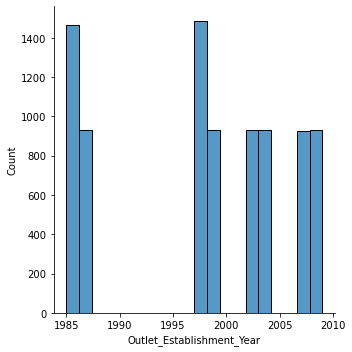

In [8]:
sns.displot(big_market_dataset['Outlet_Establishment_Year'],bins=20)

In [9]:
big_market_dataset['Outlet_Establishment_Year'].value_counts().index.sort_values()

Int64Index([1985, 1987, 1997, 1998, 1999, 2002, 2004, 2007, 2009], dtype='int64')

In [10]:
big_market_dataset['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

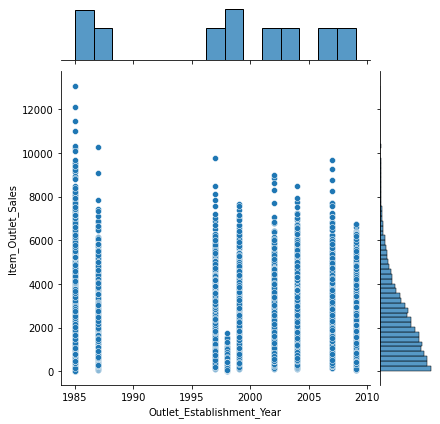

In [11]:
sns.jointplot(x=big_market_dataset['Outlet_Establishment_Year'],y=big_market_dataset['Item_Outlet_Sales'],data=big_market_dataset)

In [12]:
pd.qcut(
   big_market_dataset['Outlet_Establishment_Year'], 
   4, 
   precision=1
).unique()

[(1987.0, 1999.0], (2004.0, 2009.0], (1984.9, 1987.0], (1999.0, 2004.0]]
Categories (4, interval[float64]): [(1984.9, 1987.0] < (1987.0, 1999.0] < (1999.0, 2004.0] < (2004.0, 2009.0]]

In [13]:
big_market_dataset.loc[(big_market_dataset['Outlet_Establishment_Year']>=1984) & (big_market_dataset['Outlet_Establishment_Year']<1987),'Outlet_Yr_grp']='cat1'
big_market_dataset.loc[(big_market_dataset['Outlet_Establishment_Year']>=1987) & (big_market_dataset['Outlet_Establishment_Year']<1999),'Outlet_Yr_grp']='cat2'
big_market_dataset.loc[(big_market_dataset['Outlet_Establishment_Year']>=1999) & (big_market_dataset['Outlet_Establishment_Year']<2004),'Outlet_Yr_grp']='cat3'
big_market_dataset.loc[(big_market_dataset['Outlet_Establishment_Year']>=2004) & (big_market_dataset['Outlet_Establishment_Year']<2009),'Outlet_Yr_grp']='cat4'
big_market_dataset.loc[(big_market_dataset['Outlet_Establishment_Year']>=2009),'Outlet_Yr_grp']='cat5'

In [14]:
big_market_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Yr_grp
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,cat3
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,cat5
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,cat3
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,cat2
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,cat2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,cat2
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,cat3
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,cat4
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,cat5


In [15]:
big_market_dataset['Item_Identifier'].nunique()

1559

In [16]:
big_market_dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
big_market_dataset['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [18]:
big_market_dataset['Item_Type'].nunique()

16

In [19]:
big_market_dataset['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [20]:
big_market_dataset['Outlet_Identifier'].nunique()

10

In [21]:
big_market_dataset['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [22]:
big_market_dataset['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [23]:
big_market_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Yr_grp
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,cat3
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,cat5
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,cat3
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,cat2
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,cat2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,cat2
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,cat3
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,cat4
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,cat5


#### Handle null values in Item weight

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Fat_Content'>

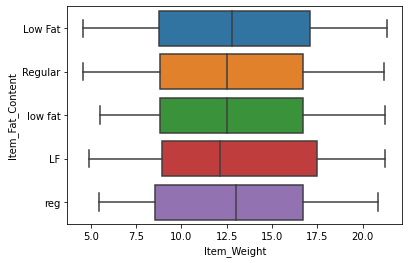

In [24]:
sns.boxplot(data=big_market_dataset,x=big_market_dataset['Item_Weight'],y=big_market_dataset['Item_Fat_Content'])

In [25]:
map_dict={"low fat":"Low Fat","LF":"Low Fat","reg":"Regular","Low Fat":"Low Fat","Regular":"Regular"}

In [26]:
big_market_dataset['Item_Fat_Content']= big_market_dataset['Item_Fat_Content'].map(map_dict)

In [27]:
big_market_dataset['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [28]:
big_market_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Yr_grp
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,cat3
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,cat5
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,cat3
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,cat2
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,cat2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,cat2
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,cat3
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,cat4
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,cat5


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Fat_Content'>

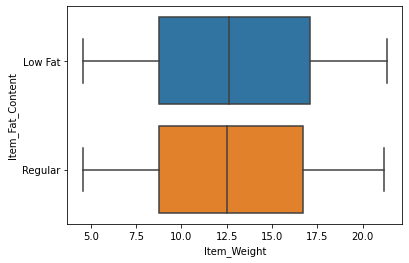

In [29]:
sns.boxplot(data=big_market_dataset,x=big_market_dataset['Item_Weight'],y=big_market_dataset['Item_Fat_Content'])

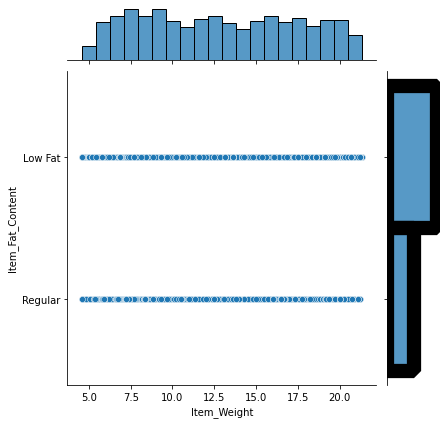

In [30]:
sns.jointplot(data=big_market_dataset,x=big_market_dataset['Item_Weight'],y=big_market_dataset['Item_Fat_Content'])

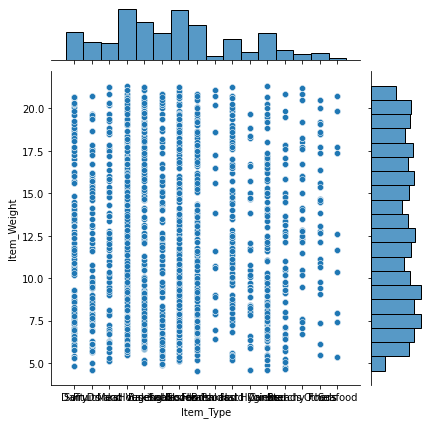

In [31]:
sns.jointplot(data=big_market_dataset,x=big_market_dataset['Item_Type'],y=big_market_dataset['Item_Weight'])

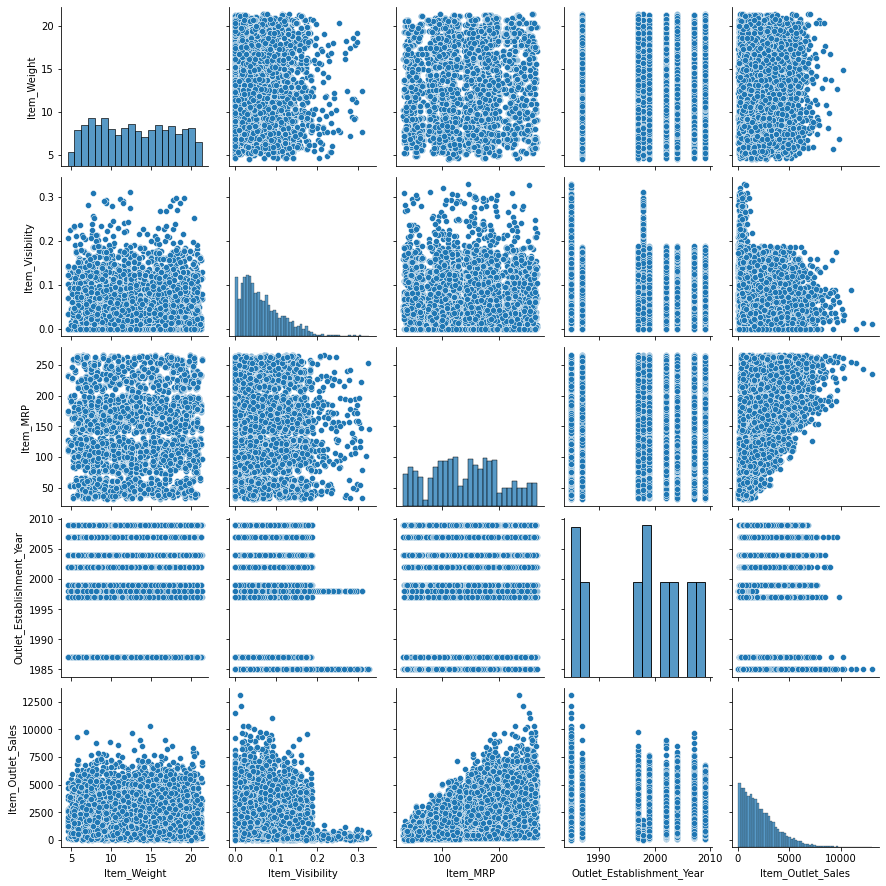

In [32]:
sns.pairplot(big_market_dataset)

In [33]:
big_market_dataset.groupby('Item_Fat_Content')['Item_Weight'].mean()

Item_Fat_Content
Low Fat    12.937387
Regular    12.711654
Name: Item_Weight, dtype: float64

In [100]:
def set_item_weight(dataset):
    print(dataset.shape)
    for data in dataset:
        if data['Item_Weight'].isna():
            print('isnull')
            if data['Item_Fat_Content']=='Low Fat':
                data['Item_Weight']=12.94
            elif data['Item_Fat_Content']=='Regular':
                data['Item_Weight']=12.71
            

In [34]:
big_market_dataset.loc[(big_market_dataset['Item_Fat_Content']=='Low Fat') & (big_market_dataset['Item_Weight'].isnull())]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Yr_grp
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,cat1
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,cat1
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,cat1
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950,cat1
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720,cat1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,NaN,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020,cat1
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490,cat1
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150,cat1
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120,cat1


In [35]:
big_market_dataset.loc[(big_market_dataset['Item_Fat_Content']=='Low Fat') & (big_market_dataset['Item_Weight'].isnull()),'Item_Weight']=12.94
big_market_dataset.loc[(big_market_dataset['Item_Fat_Content']=='Regular') & (big_market_dataset['Item_Weight'].isnull()),'Item_Weight']=12.71

In [36]:
big_market_dataset['Item_Weight'].isnull().sum()

0

### Update null values in Item Outlet Size

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


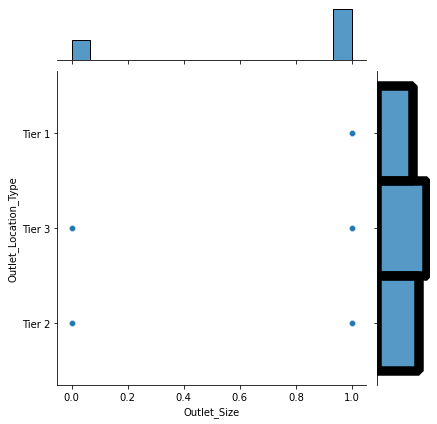

In [37]:
sns.jointplot(x=~big_market_dataset['Outlet_Size'].isna(),y=big_market_dataset['Outlet_Location_Type'])

In [38]:
big_market_dataset['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

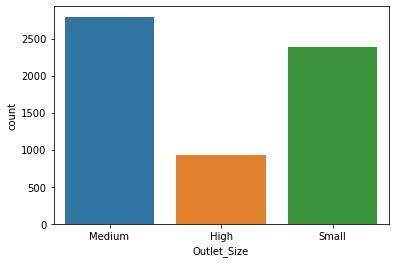

In [39]:
sns.countplot(big_market_dataset['Outlet_Size'])

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

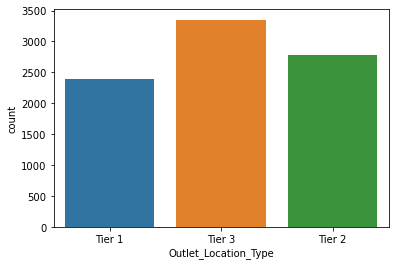

In [40]:
sns.countplot(big_market_dataset['Outlet_Location_Type'])

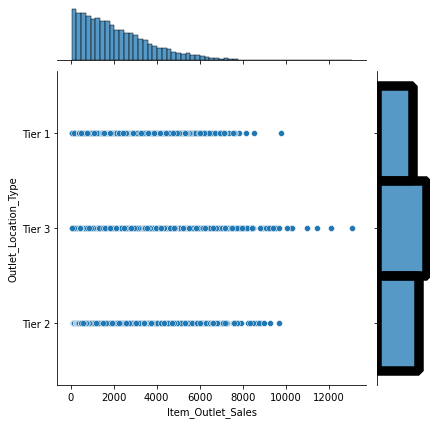

In [41]:
sns.jointplot(x=big_market_dataset['Item_Outlet_Sales'],y=big_market_dataset['Outlet_Location_Type'])

In [42]:
temp_df=big_market_dataset.copy()
temp_df['Outlet_Size'].fillna(value="temp",inplace=True)
temp_df['Outlet_Size'].unique()
#sns.jointplot(x=temp_df['Outlet_Size'].notna(),y=temp_df['Outlet_Location_Type'])

array(['Medium', 'temp', 'High', 'Small'], dtype=object)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Outlet_Location_Type'>

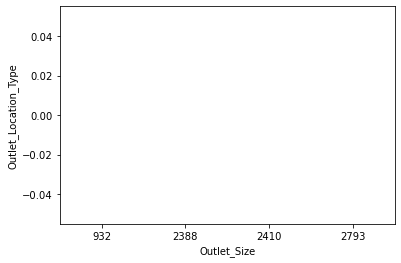

In [43]:
sns.barplot(x=temp_df['Outlet_Size'].value_counts(),y=temp_df['Outlet_Location_Type'].value_counts())

In [44]:
big_market_dataset[['Outlet_Location_Type','Outlet_Size']].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 3                Medium         1863
Tier 1                Small          1458
Tier 3                High            932
Tier 1                Medium          930
Tier 2                Small           930
dtype: int64

In [45]:
big_market_dataset.loc[(big_market_dataset['Outlet_Location_Type']=='Tier 3') & (big_market_dataset['Outlet_Size'].isnull()),'Outlet_Size']='Medium'
big_market_dataset.loc[(big_market_dataset['Outlet_Location_Type']=='Tier 2') & (big_market_dataset['Outlet_Size'].isnull()),'Outlet_Size']='Small'
big_market_dataset.loc[(big_market_dataset['Outlet_Location_Type']=='Tier 1') & (big_market_dataset['Outlet_Size'].isnull()),'Outlet_Size']='Small'

In [46]:
big_market_dataset['Outlet_Size'].isnull().sum()

0

### Feature Engineering

In [47]:
big_market_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Outlet_Yr_grp              8523 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

In [48]:
feature_df=pd.get_dummies(big_market_dataset[['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type','Outlet_Size','Outlet_Yr_grp']],drop_first=True)

In [49]:
big_market_dataset

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Yr_grp
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,cat3
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,cat5
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,cat3
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,cat2
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,cat2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,cat2
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,cat3
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,cat4
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,cat5


In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
trial_df=big_market_dataset.copy()

In [52]:
le_item=LabelEncoder()

In [53]:
le_outlet=LabelEncoder()

In [54]:
le_item.fit(trial_df['Item_Identifier'])

LabelEncoder()

In [55]:
trial_df['Item_Identifier']=le_item.transform(trial_df['Item_Identifier'])

In [56]:
le_outlet.fit(trial_df['Outlet_Identifier'])

LabelEncoder()

In [57]:
trial_df['Outlet_Identifier']=le_outlet.transform(trial_df['Outlet_Identifier'])

In [58]:
trial_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Yr_grp
0,156,9.300,Low Fat,0.016047,Dairy,249.8092,9,1999,Medium,Tier 1,Supermarket Type1,3735.1380,cat3
1,8,5.920,Regular,0.019278,Soft Drinks,48.2692,3,2009,Medium,Tier 3,Supermarket Type2,443.4228,cat5
2,662,17.500,Low Fat,0.016760,Meat,141.6180,9,1999,Medium,Tier 1,Supermarket Type1,2097.2700,cat3
3,1121,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,0,1998,Medium,Tier 3,Grocery Store,732.3800,cat2
4,1297,8.930,Low Fat,0.000000,Household,53.8614,1,1987,High,Tier 3,Supermarket Type1,994.7052,cat2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,Low Fat,0.056783,Snack Foods,214.5218,1,1987,High,Tier 3,Supermarket Type1,2778.3834,cat2
8519,897,8.380,Regular,0.046982,Baking Goods,108.1570,7,2002,Small,Tier 2,Supermarket Type1,549.2850,cat3
8520,1357,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,6,2004,Small,Tier 2,Supermarket Type1,1193.1136,cat4
8521,681,7.210,Regular,0.145221,Snack Foods,103.1332,3,2009,Medium,Tier 3,Supermarket Type2,1845.5976,cat5


In [59]:
trial_df=pd.concat([trial_df,feature_df],axis=1)

In [60]:
trial_df.drop(labels=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type','Outlet_Yr_grp','Outlet_Establishment_Year'],axis=1,inplace=True)

In [61]:
trial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   int32  
 1   Item_Weight                      8523 non-null   float64
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Identifier                8523 non-null   int32  
 5   Outlet_Size                      8523 non-null   object 
 6   Item_Outlet_Sales                8523 non-null   float64
 7   Item_Fat_Content_Regular         8523 non-null   uint8  
 8   Item_Type_Breads                 8523 non-null   uint8  
 9   Item_Type_Breakfast              8523 non-null   uint8  
 10  Item_Type_Canned                 8523 non-null   uint8  
 11  Item_Type_Dairy                  8523 non-null   uint8  
 12  Item_Type_Frozen Foo

In [62]:
trial_df.drop(labels=['Outlet_Size'],axis=1,inplace=True)

In [63]:
big_market_dataset[['Outlet_Location_Type','Outlet_Size']].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 2                Small          2785
Tier 3                Medium         2418
Tier 1                Small          1458
Tier 3                High            932
Tier 1                Medium          930
dtype: int64

### Model Building

In [64]:
trial_df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Yr_grp_cat2,Outlet_Yr_grp_cat3,Outlet_Yr_grp_cat4,Outlet_Yr_grp_cat5
0,156,9.300,0.016047,249.8092,9,3735.1380,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,8,5.920,0.019278,48.2692,3,443.4228,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1
2,662,17.500,0.016760,141.6180,9,2097.2700,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,1121,19.200,0.000000,182.0950,0,732.3800,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,1297,8.930,0.000000,53.8614,1,994.7052,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0.056783,214.5218,1,2778.3834,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
8519,897,8.380,0.046982,108.1570,7,549.2850,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
8520,1357,10.600,0.035186,85.1224,6,1193.1136,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
8521,681,7.210,0.145221,103.1332,3,1845.5976,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1


In [65]:
trial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   int32  
 1   Item_Weight                      8523 non-null   float64
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Identifier                8523 non-null   int32  
 5   Item_Outlet_Sales                8523 non-null   float64
 6   Item_Fat_Content_Regular         8523 non-null   uint8  
 7   Item_Type_Breads                 8523 non-null   uint8  
 8   Item_Type_Breakfast              8523 non-null   uint8  
 9   Item_Type_Canned                 8523 non-null   uint8  
 10  Item_Type_Dairy                  8523 non-null   uint8  
 11  Item_Type_Frozen Foods           8523 non-null   uint8  
 12  Item_Type_Fruits and

In [66]:
trial_df.describe()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Yr_grp_cat2,Outlet_Yr_grp_cat3,Outlet_Yr_grp_cat4,Outlet_Yr_grp_cat5
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857965,0.066132,140.992782,4.722281,2181.288914,0.352693,0.029450,0.012906,0.076147,...,0.393054,0.654347,0.108882,0.109703,0.392819,0.497829,0.283586,0.218116,0.217764,0.108882
std,449.222377,4.226368,0.051598,62.275067,2.837201,1706.499616,0.477836,0.169073,0.112877,0.265249,...,0.488457,0.475609,0.311509,0.312538,0.488406,0.500025,0.450765,0.412991,0.412750,0.311509
min,0.000000,4.555000,0.000000,31.290000,0.000000,33.290000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,395.500000,9.310000,0.026989,93.826500,2.000000,834.247400,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,783.000000,12.940000,0.053931,143.012800,5.000000,1794.331000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1167.000000,16.000000,0.094585,185.643700,7.000000,3101.296400,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1558.000000,21.350000,0.328391,266.888400,9.000000,13086.964800,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
X=trial_df.drop('Item_Outlet_Sales',axis=1)
y=trial_df['Item_Outlet_Sales']

In [68]:
X.shape

(8523, 32)

In [69]:
y.shape

(8523,)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lr=LinearRegression()

In [66]:
lr.fit(X_train,y_train)

LinearRegression()

In [289]:
from sklearn.model_selection import cross_val_score,KFold
kfold=KFold(n_splits=7,shuffle=True)
rmse=cross_val_score(lr,X_train,y_train,scoring='neg_root_mean_squared_error',cv=kfold)
rmse

array([-1132.33554858, -1143.05517685, -1115.19320392, -1155.53474205,
       -1191.83254175, -1117.19246487, -1176.60877247])

In [290]:
y_predict=lr.predict(X_test)

In [301]:
list(y_predict)
count=0
for i in y_predict:
    if i<0:
        count+=1
print(count)
print(y_predict.shape)

162
(2813,)


In [291]:
from sklearn import metrics

print(lr.intercept_)

In [69]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Item_Identifier,0.032765
Item_Weight,-2.380934
Item_Visibility,-568.773638
Item_MRP,15.887952
Outlet_Identifier,97.703349
Outlet_Establishment_Year,129.355116
Item_Fat_Content_Regular,73.487989
Item_Type_Breads,-27.704114
Item_Type_Breakfast,24.342404
Item_Type_Canned,59.788598


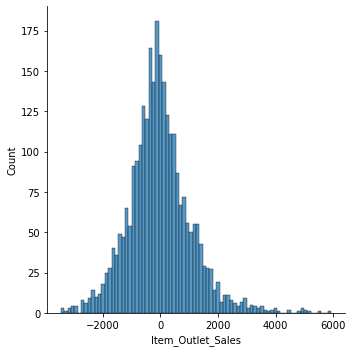

In [292]:
sns.displot(y_test-y_predict,bins=80)

In [293]:
metrics.mean_squared_error(y_test,y_predict)

1215473.3658210072

In [294]:
metrics.mean_absolute_error(y_test,y_predict)

813.99522496293

In [295]:
np.sqrt(metrics.mean_absolute_error(y_test,y_predict))

28.530601552770143

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

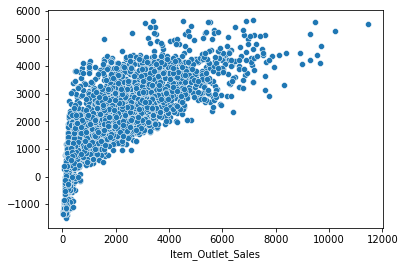

In [296]:
sns.scatterplot(y_test,y_predict)

In [96]:
test_file=pd.read_csv('test_AbJTz2l.csv')

In [97]:
test_file.shape

(5681, 11)

In [98]:
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [99]:
test_file['Outlet_Establishment_Year'].unique()

array([1999, 2007, 1998, 1985, 1997, 2009, 2002, 1987, 2004], dtype=int64)

In [100]:
test_file['Item_Fat_Content']= test_file['Item_Fat_Content'].map(map_dict)

In [101]:
test_file.loc[(test_file['Item_Fat_Content']=='Low Fat') & (test_file['Item_Weight'].isnull()),'Item_Weight']=12.94
test_file.loc[(test_file['Item_Fat_Content']=='Regular') & (test_file['Item_Weight'].isnull()),'Item_Weight']=12.71

In [102]:
test_file.loc[(test_file['Outlet_Location_Type']=='Tier 3') & (test_file['Outlet_Size'].isnull()),'Outlet_Size']='Medium'
test_file.loc[(test_file['Outlet_Location_Type']=='Tier 2') & (test_file['Outlet_Size'].isnull()),'Outlet_Size']='Small'
test_file.loc[(test_file['Outlet_Location_Type']=='Tier 1') & (test_file['Outlet_Size'].isnull()),'Outlet_Size']='Small'

In [103]:
test_file.loc[(test_file['Outlet_Establishment_Year']>=1984) & (test_file['Outlet_Establishment_Year']<1987),'Outlet_Yr_grp']='cat1'
test_file.loc[(test_file['Outlet_Establishment_Year']>=1987) & (test_file['Outlet_Establishment_Year']<1999),'Outlet_Yr_grp']='cat2'
test_file.loc[(test_file['Outlet_Establishment_Year']>=1999) & (test_file['Outlet_Establishment_Year']<2004),'Outlet_Yr_grp']='cat3'
test_file.loc[(test_file['Outlet_Establishment_Year']>=2004) & (test_file['Outlet_Establishment_Year']<2009),'Outlet_Yr_grp']='cat4'
test_file.loc[(test_file['Outlet_Establishment_Year']>=2009),'Outlet_Yr_grp']='cat5'

In [104]:
dummy_feature=pd.get_dummies(test_file[['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type','Outlet_Size','Outlet_Yr_grp']],drop_first=True)

In [105]:
le_item_test=LabelEncoder()
le_outlet_test=LabelEncoder()

In [106]:
print(test_file['Item_Identifier'].unique())
print(test_file['Outlet_Identifier'].unique())

['FDW58' 'FDW14' 'NCN55' ... 'NCI29' 'FDP28' 'FDF04']
['OUT049' 'OUT017' 'OUT010' 'OUT027' 'OUT046' 'OUT018' 'OUT045' 'OUT019'
 'OUT013' 'OUT035']


In [107]:
le_item_test.fit(test_file['Item_Identifier'])
le_outlet_test.fit(test_file['Outlet_Identifier'])
test_file['Item_Identifier']=le_item_test.transform(test_file['Item_Identifier'])
test_file['Outlet_Identifier']=le_outlet_test.transform(test_file['Outlet_Identifier'])

In [108]:
test_file=pd.concat([test_file,dummy_feature],axis=1)

In [109]:
test_file.drop(labels=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Type','Outlet_Size','Outlet_Yr_grp','Outlet_Establishment_Year'],axis=1,inplace=True)

In [113]:
final_test_pred=GB.predict(test_file)

In [276]:
final_test_pred=lr.predict(test_file)

In [311]:
final_test_pred=dtree.predict(test_file)

In [327]:
final_test_pred=ridge_regressor.predict(test_file)

In [343]:
final_test_pred=lasso_regressor.predict(test_file)

In [234]:
final_test_pred=RFR.predict(test_file)

In [114]:
Prediction_result=pd.DataFrame()

In [115]:
Prediction_result['Item_Identifier']=test_file['Item_Identifier']

In [116]:
Prediction_result['Outlet_Identifier']=test_file['Outlet_Identifier']

In [117]:
print(Prediction_result['Item_Identifier'].unique())
print(Prediction_result['Outlet_Identifier'].unique())

[1103 1067 1406 ... 1332  745  356]
[9 2 0 5 8 3 7 4 1 6]


In [118]:
Prediction_result['Item_Outlet_Sales']=final_test_pred

In [119]:
Prediction_result

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,1103,9,1650.802829
1,1067,2,1400.665725
2,1406,0,680.800108
3,809,2,2460.447190
4,1184,5,6034.313867
...,...,...,...
5676,231,8,2030.591099
5677,306,3,2219.905718
5678,1412,7,1859.781762
5679,517,2,3682.901147


In [120]:
Prediction_result['Item_Identifier']=le_item_test.inverse_transform(Prediction_result['Item_Identifier'])

In [121]:
Prediction_result['Outlet_Identifier']=le_outlet_test.inverse_transform(Prediction_result['Outlet_Identifier'])

In [122]:
Prediction_result

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1650.802829
1,FDW14,OUT017,1400.665725
2,NCN55,OUT010,680.800108
3,FDQ58,OUT017,2460.447190
4,FDY38,OUT027,6034.313867
...,...,...,...
5676,FDB58,OUT046,2030.591099
5677,FDD47,OUT018,2219.905718
5678,NCO17,OUT045,1859.781762
5679,FDJ26,OUT017,3682.901147


In [128]:
count=0
list(final_test_pred)
for i in final_test_pred:
    if i<0:
        count+=1
count

59

In [127]:
Prediction_result.to_csv('final_test_result',index=False)

### Decision TRee

In [146]:
from sklearn.tree import DecisionTreeRegressor

In [303]:
dtree=DecisionTreeRegressor()

In [ ]:
params={''}

In [304]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [305]:
predict=dtree.predict(X_test)

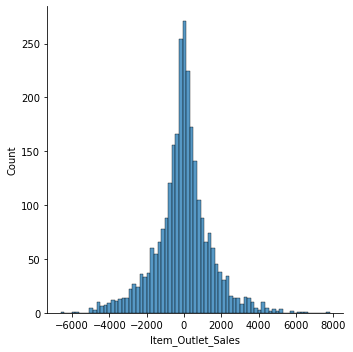

In [306]:
sns.displot(y_test-predict)

In [307]:
from sklearn import metrics

In [308]:
metrics.mean_absolute_error(y_test,predict)

1056.5957242090294

In [309]:
metrics.mean_squared_error(y_test,predict)

2280977.746668351

In [310]:
np.sqrt(metrics.mean_squared_error(y_test,predict))

1510.2906166259363

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

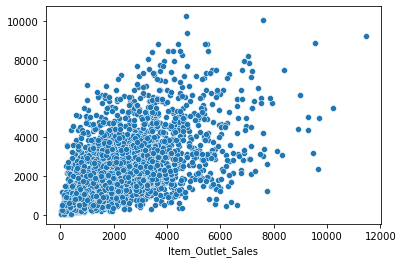

In [366]:
sns.scatterplot(y_test,predict)

In [214]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
y_pred=RFR.predict(X_test)

In [216]:
from sklearn import metrics
metrics.mean_squared_error(y_test,y_pred)

1260438.7863575197

In [217]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

1122.692649997104

In [373]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5477053441351649

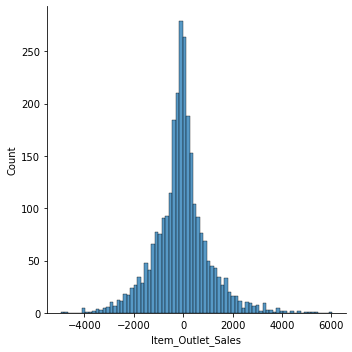

In [370]:
sns.displot(y_test-y_pred)

C:\Users\shiva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

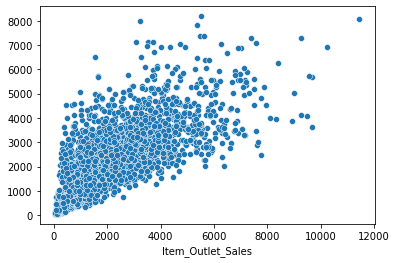

In [371]:
sns.scatterplot(y_test,y_pred)

In [324]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV,KFold
ridge=Ridge()

params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}

kfold=KFold(n_splits=7,shuffle=True, random_state=24)
ridge_regressor=GridSearchCV(ridge,params,scoring='neg_root_mean_squared_error',cv=kfold)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=7, random_state=24, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_root_mean_squared_error')

In [325]:
y_pred=ridge_regressor.predict(X_test)

In [326]:
metrics.mean_squared_error(y_test,y_pred)

1215576.8843069933

In [339]:
#Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()

params={'alpha':[1e-17,1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,70,80,90,100]}

kfold=KFold(n_splits=11,shuffle=True)
lasso_regressor=GridSearchCV(lasso,params,scoring='neg_root_mean_squared_error',cv=kfold)
lasso_regressor.fit(X_train,y_train)

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3375330186.8847923, tolerance: 1525799.3580084902
  model = cd_fast.enet_coordinate_descent(
C:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3307060674.548881, tolerance: 1511777.68796666
  model = cd_fast.enet_coordinate_descent(
C:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3427962533.4767303, tolerance: 1563894.066976402
  model = cd_fast.enet_coordinate_descent(
C:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarn

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3404140966.289508, tolerance: 1549098.7371592722
  model = cd_fast.enet_coordinate_descent(
C:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3393337793.9158945, tolerance: 1543663.9400852958
  model = cd_fast.enet_coordinate_descent(
C:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3429262106.5498214, tolerance: 1554435.730010481
  model = cd_fast.enet_coordinate_descent(
C:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWa

C:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3357612596.121344, tolerance: 1563894.066976402
  model = cd_fast.enet_coordinate_descent(
C:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3328500010.8279543, tolerance: 1543434.373257488
  model = cd_fast.enet_coordinate_descent(
C:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3332009115.8655615, tolerance: 1536672.8282934355
  model = cd_fast.enet_coordinate_descent(
C:\Users\shiva\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWar

GridSearchCV(cv=KFold(n_splits=11, random_state=None, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [1e-17, 1e-15, 1e-10, 1e-08, 0.001, 0.01, 1,
                                   5, 10, 20, 30, 35, 40, 45, 50, 55, 60, 70,
                                   80, 90, 100]},
             scoring='neg_root_mean_squared_error')

In [341]:
y_pred=lasso_regressor.predict(X_test)

In [342]:
metrics.mean_squared_error(y_test,y_pred)

1212491.5704785541

In [91]:
from sklearn.linear_model import LinearRegression, SGDRegressor, ElasticNet, Ridge
from sklearn.linear_model import Ridge
from datetime import timedelta
import time
import pickle
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [92]:
def build_models(X,y):
    models={}
    training_times = {}
    
    # Linear Regression    
    lr = LinearRegression()
    start_time = time.time()
    lr.fit(X,y)
    print("LR fitted")
    elapsed_time_secs = timedelta(seconds=round(time.time() - start_time))
    models.update({"Linear Regression":lr})
    training_times.update({"Linear Regression":elapsed_time_secs.seconds})
    print("Dictionary updated")

    # SGD Regression    
    SGD = SGDRegressor(early_stopping=True)
    start_time = time.time()
    SGD.fit(X,y)
    print("SGD fitted")
    elapsed_time_secs = timedelta(seconds=round(time.time() - start_time))
    models.update({"SGD Regressor":SGD})
    training_times.update({"SGD Regressor":elapsed_time_secs.seconds})
    print("Dictionary updated")

    # GB Regression    
    GB = GradientBoostingRegressor()
    start_time = time.time()
    GB.fit(X,y)
    print("GB fitted")
    elapsed_time_secs = timedelta(seconds=round(time.time() - start_time))
    models.update({"Gradient Boosting Regressor":GB})
    training_times.update({"Gradient Boosting Regressor":elapsed_time_secs.seconds})
    print("Dictionary updated")

    # Ridge
    ridge = Ridge(alpha=0.5)
    start_time = time.time()
    ridge.fit(X,y)
    print("RIDGE fitted")
    elapsed_time_secs = timedelta(seconds=round(time.time() - start_time))
    models.update({"Ridge":ridge})
    training_times.update({"Ridge":elapsed_time_secs.seconds})
    print("Dictionary updated")
    
    # XGBoost
    xg = XGBRegressor()
    start_time = time.time()
    xg.fit(X,y)
    print("XGB fitted")
    elapsed_time_secs = timedelta(seconds=round(time.time() - start_time))
    models.update({"XG Boost":xg})
    training_times.update({"XG Boost":elapsed_time_secs.seconds})
    print("Dictionary updated")
    
    #Random FOrest Regressor
    rfr=RandomForestRegressor()
    start_time=time.time()
    rfr.fit(X,y)
    print("Random forest regressor fitted")
    elapsed_time_secs = timedelta(seconds=round(time.time() - start_time))
    models.update({"Random Forest Regressor":rfr})
    training_times.update({"Random Forest Regressor":elapsed_time_secs.seconds})
    print("Dictionary updated")
    
    #KNN
    knr=KNeighborsRegressor()
    start_time=time.time()
    knr.fit(X,y)
    print("KNeighborsRegressor fitted")
    elapsed_time_secs = timedelta(seconds=round(time.time() - start_time))
    models.update({"KNeighborsRegressor":knr})
    training_times.update({"KNeighborsRegressor":elapsed_time_secs.seconds})
    print("Dictionary updated")
    
    return models,training_times
    

In [93]:
def model_evaluation(models, X_test, y_test, training_dur=None, nn=False):
    scores={}  
    class_wise_accuracy = {}

    for model in models:
        
        #if model.nn():
            #pred = model.predict(X_test)
        #else:
        pred = models[model].predict(X_test)


        EVS = explained_variance_score(y_test, pred)
        #print(EVS)
        R2_Score = r2_score(y_test,pred)
        #print(R2_Score)
        neg_MAG = mean_absolute_error(y_test, pred)
        #print(neg_MAG)
        neg_MSE = mean_squared_error(y_test, pred)
        #print(neg_MSE)
        neg_RMSE = np.sqrt(mean_squared_error(y_test, pred))
        #print(neg_RMSE)
        #roc_auc = roc_auc_score(y_test, pred, , average='macro')

        scores.update({model:[EVS,R2_Score,neg_MAG,neg_MSE,neg_RMSE]})
        #print(scores)

    metric_df = pd.DataFrame(scores, index=["EVS","R2 Score","Neg MAG","Neg MSE", "Neg RMSE"])
    #print(metric_df)
    training_dura=pd.DataFrame(training_dur,index=['Training Time'])
    #print(training_dura)
    metric_df=metric_df.transpose()
    training_dura=training_dura.transpose()
    #print(metric_df)
    #print(training_dura)
    metric_and_training_dur =metric_df.join(training_dura) #pd.concat(metric_df,training_dura,axis=1)

    final_df = metric_and_training_dur
    #print(final_df)
    return final_df

In [94]:
models,training_times=build_models(X_train,y_train)

LR fitted
Dictionary updated
SGD fitted
Dictionary updated
GB fitted
Dictionary updated
RIDGE fitted
Dictionary updated
XGB fitted
Dictionary updated
Random forest regressor fitted
Dictionary updated
KNeighborsRegressor fitted
Dictionary updated


In [95]:
model_evaluation(models,X_test,y_test,training_times)

,EVS,R2 Score,Neg MAG,Neg MSE,Neg RMSE,Training Time
Linear Regression,5.664941e-01,5.663246e-01,8.139952e+02,1.215473e+06,1.102485e+03,0
SGD Regressor,-1.459463e+21,-5.535349e+21,1.069940e+14,1.551407e+28,1.245555e+14,0
Gradient Boosting Regressor,5.931896e-01,5.924071e-01,7.584487e+02,1.142371e+06,1.068818e+03,1
Ridge,5.665801e-01,5.664098e-01,8.138332e+02,1.215235e+06,1.102377e+03,0
XG Boost,5.233779e-01,5.228677e-01,8.068042e+02,1.337271e+06,1.156404e+03,1
Random Forest Regressor,5.528839e-01,5.515124e-01,7.795724e+02,1.256988e+06,1.121155e+03,5
KNeighborsRegressor,1.780117e-01,1.750502e-01,1.123259e+03,2.312109e+06,1.520562e+03,0


In [111]:
GB = GradientBoostingRegressor()
start_time = time.time()
GB.fit(X,y)
print("GB fitted")
elapsed_time_secs = timedelta(seconds=round(time.time() - start_time))
models.update({"Gradient Boosting Regressor":GB})
training_times.update({"Gradient Boosting Regressor":elapsed_time_secs.seconds})
print("Dictionary updated")


GB fitted
Dictionary updated
